# Reversible groundwater storage

## Loading modules


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pdb

In the remainder of this syllabus, we will restrict ourselves to reversible groundwater storage phenomena only, i.e. phenomena in which the porous medium is not changed.

In groundwater flow systems, three separate forms of storage may be distinguished:

1. Phreatic storage, which occurs in unconfined aquifers, i.e. aquifers with a free water table. It is due to filling and emptying of pores at the top of the saturated zone.

2. Elastic storage, which is due to combined compressibility of the water, the grains and the porous matrix (soil skeleton).

3. Sometimes the interface between fresh water and another fluid (be it saline water, oil or gas) can provide a third type of storage. This works by displacement of the interface, generally between the fresh water and the saline water. When displacing an interface, the total volume of water in the subsurface remains the same, however, the amount of usable fresh water may increase (or decrease) at the cost of saline water, and therefore, one may consider this storage of fresh water.

# Specific yield

The water table in an unconfined or phreatic layer is the elevation where the pressure equals the atmospheric pressure. It is in no way a sharp boundary between water and air, like it is between the water table of surface water and the air above it. The boundary between the saturated and unsaturated zone is not sharp, there is water throughout most of the unsaturated zone, that is, above the plane where the pressure equals the atmospheric one. In this lecture we study the this zone and its implications for the specific yield of an aquifer. What happens when we say that the water table sinks or rises?

Phreatic storage is due to the filling and emptying of pores above the saturated zone, i.e. above the water table. Because it is related to changes of the water table, it is limited to phreatic (unconfined) aquifers.

The storage coefficient for an unconfined aquifer is called specific yield and is denoted by the symbol $S_{y}$. It is dimensionless, as follows from its definition 

$$S_{y}=\frac{\partial V_{w}}{\partial h}$$

where $\partial V_{w}$ is the change of volume of water from a column of aquifer per unit of surface area and $dh$ is the change of the water table elevation.

$S_{y}S_{y}$, therefore, is the amount of water released from storage per square meter of aquifer per m drawdown of the water table.

Hydrogeologists, and groundwater engineers alike, often treat specific yield as a constant. In reality, the draining and filling of pores is more complex and this should be kept in mind in order to judge differences of $S_{y}$ values under different circumstances even with the same aquifer material. This will be explained further down.

There is no such thing as a sharp boundary between the saturated and the unsaturated porous medium above and below the water table. In fact, the water content is continuous across the water table.

The water table is, by definition, the elevation where the pressure equals atmospheric pressure

Because we relate all pressures relative to atmospheric we may say the water table is the elevation where the water pressure is zero (relative to the pressure of the atmosphere).

The soil itself may be considered to consist of a dense network of connected tortuous pores of widely varying diameter that may be fully or partially filled with water. Due to adhesive forces pores may even be fully filled above the water table.

In pores above the water table the pressure is negative (i.e. below atmospheric).

If grains can be wetted (attract water), as is generally the case with water, water will be sucked against gravity, into the pores above the water table over a certain height. This height mainly depends on the diameter of the pores.

### Unsaturated zoneCapillary zone

For the purpose of better understanding the unsaturared zone, one often envisions it as a network of small interconnected pores. The most simple picture is that of a single vertical pore, a straw, that ends in the saturated zone. We know from experience that, if the straw is small enough, the water in it will rise above the water table. We have learned to say that this is due to adhesion between the water and the wall of the pore.

![Capillary rise in a thin straw](./pictures/capillaryStraw.png)

Looking at this straw with the water risen in it until it has reached equilibrium, the relation describing it is easy enough. The weight of the water that has been sucked up must equal the cohesion around the circumference of the straw. Hence:

$$ \rho g h_c \pi r^2 = 2 \pi r \gamma \cos \alpha $$

where $\rho$ [kg/m3] is the density of the fluid, $g$ [N/lg] is gravity, $r$ [m] the radius of the straw $\gamma$ [N/m] the cohesion force and $\alpha$ [radians, i.e. L/L] the angle that the water surface makes with the surface of the straw.

Hence

$$ h_c = \frac {2 \gamma \cos \alpha} { \rho \, g \, r } $$

A first exercise is to gain a feeling for how large this suction can be.

To get an idea, we know that surface tension $\tau$ [N/m] works in the free water surface in the straw, and we know its value from our school handbooks or from looking it up in the Internet:

$$\tau = 75 \times 10^{-3} \,\, N/m$$

If the angle $\alpha$ is small, and it often is the case with wettable surfaces like sand (for clean glass it is even $\alpha \approx 0$, then $\cos \alpha \approx 1$, so that $\gamma\approx \tau$.

With this we have

$$ h_x \approx \frac {2 \tau } { \rho \, g \, r} $$

Then we should have an idea how large the radius of the pores of a porous medium are.

If we have a matrix consisting of spheres of radius $r$ and a porosity $\epsilon$ we have for the volume the grains in a m3:

$$ V_g = \frac 1 6 \pi d^3 n  =  1 - \epsilon $$

with $n$ the number of grains in one m3. The surface area of this mass equals

$$ A =  \pi d^2 n   $$

Noting that the grais and the pores share the same surface area, we have the following ratio

$$ \frac {V_g} A = \frac {1-\epsilon} A = \frac {d_g} 6  $$

$$ \frac {V_p} A = \frac \epsilon A = \frac {d_p} 6 $$ 

allowing to conclude that 

$$ d_p = \frac \epsilon {1 - \epsilon} d_g $$

while $ d_g  $ can be obtained from sand-sieving. With an often found value of $\epsilon \approx 35% $ we get

$$ r_p \approx 0.5 r_g = 0.25 d_g $$


Let's say we have the following grain diameters:

In [2]:
dg = np.array([0.002, 0.063, 0.2, 0.630, 2.0 ]) * 1e-3 # mm

values that bound the following bin names "silt", "fine sand", "medium sand", "coarse sand"

Then we could compute the capillary rise for straws with these pores like

In [3]:
g   = 9.81 # N/kg (gravity)
rho = 1000. # kg/m3 (water)
tau = 75e-3 # N/m
por = 0.35

rp  = dg * por / (1 - por)
hc  = 2 * tau / (rho * g * rp)

print("\n\nResults of computing capillary rise given grain diameters (porosity = {}):\n".format(por))
print( (16*" " + "{:>8s} | {:>8s} | {:>8s} | {:>8s} | {:>8s} | {:>8s}").
      format("clay  ","silt  ","fine sand","med. sand","crs sand", "gravel"))
print("Grain diam.[mm]: ", end="");  print(("{:11.3g}" * len(dg)).format(*(dg * 1000)))
print("Grain diam. [m]: ", end="");  print(("{:11.3g}" * len(dg)).format(*dg))
print("Pore radius [m]: ", end="");  print(("{:11.3g}" * len(rp)).format(*rp))
print("Cap. rise   [m]: ", end="");  print(("{:11.3g}" * len(rp)).format(*hc))
print()



Results of computing capillary rise given grain diameters (porosity = 0.35):

                  clay   |   silt   | fine sand | med. sand | crs sand |   gravel
Grain diam.[mm]:       0.002      0.063        0.2       0.63          2
Grain diam. [m]:       2e-06    6.3e-05     0.0002    0.00063      0.002
Pore radius [m]:    1.08e-06   3.39e-05   0.000108   0.000339    0.00108
Cap. rise   [m]:        14.2      0.451      0.142     0.0451     0.0142



This shows that in the range sand, the capillary rise is expected to vary from about 1.5 cm for coarse sand of grain diameter of 2 mm to about 0.5 m for fine sand of grain size diameter of 0.06 mm.

Aquifer material, i.e. sediment, has different pore sizes, therefore, it could be presented as a bungle of straws with different sizes in which the water rises to different heights in accordance with the radius of each straw.

![A sediment conceptually visualized as a bundle of straws of different radius](./pictures/capillaryTubes.png)

Due to the presence of many pore sizes, will the moisture content of the sand decline with distance from the water table. The thickness of the capillary zone is that which corresponds to $h_c$ of the widest pores. Above this elevation, more and more pores will be dry and the lower will be the water content, as shown in the figure to the right.

A soil property is the so-called "air entry pressure". This is the air pressure that has to be imposed at one end of a soil sample with ambulant air pressure at the down side, before the air is blown through the sample. What is the relation between this "air entry pressure", pore width and the eight of the full-capillary zone?

### Moisture content and sediment particle distribution (sand sieve curves)

Real aquifer material has a grain size distribution that shows the mass fraction versus grain diameter, as made visible by sieving the sand with a set of seives with different stanard opening size ane weighing the amount of sand that remains on each sieve. Such curves often look like a cumulative normal probbility density function, such as the one below, which is readily generated by sampling for instance a million times the normal probability density function, collect the samples in a set of bins and draw a histogram for them, or rather a comulative histogam like so: 

<IPython.core.display.Javascript object>


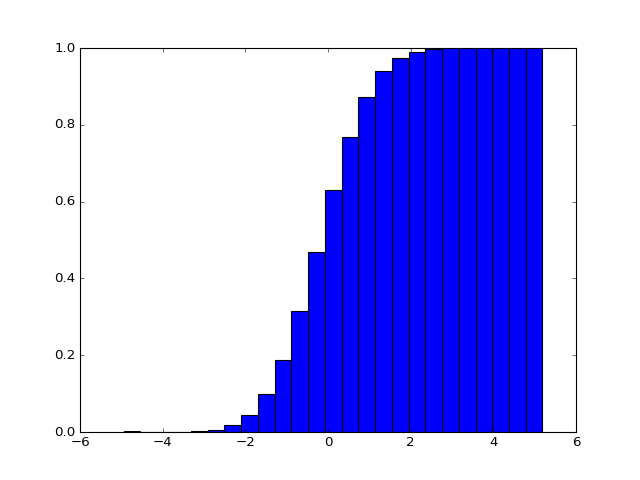

In [4]:
x = plt.hist(np.random.randn(int(1e6)), bins=25, cumulative=True, normed=True)

If this were a sieve curve, then the values on the x-axis would be the grain diameter on log scale. So then the -2 would meen 0.01 mm, 0 would mean 1 mm and 2 100 mm. Then, in fact the distribution is not normal, but log-normal (it is normal when the horizontal axis is plotted on log-scale). The vertical axis of sieve curse is the mass fraction that has a grain size smaller than d. So the $y$-axis starts at zero and runs to 1.0.

The normal probability density function is defined as

$$ p = \frac 1 {\sqrt {2 \pi} } \exp \left( - \frac { (x -\mu)^2 } {2 \sigma^2 } \right) $$

On log scale, $x = \log d$ and $\mu = \log d_{50}$ while $\sigma$ can be expressed as a factor as it yields a constant distance on log scale. $\sigma = \log \alpha$

$$p = \frac 1 {\sqrt{ 2 \pi } } \exp \left(- \frac {\log^2 \left( \frac d {d_{50}} \right)} {2 \log^2 \alpha} \right)$$

The spread of a sieve curve is normally quantified by its so-called coefficient of uniformity, $U= \frac {d_{60}} {d_{10}}$. For a normal distribution we could rather use $\sigma$ or $2 \sigma$ which is the distance between the points where the cumative probability density functions has the value of 84% and 16%. (Remember that 68% of the samples from a probability density function lie between $\mu - \sigma$ and $\mu + \sigma$, that is, 16% lie below $\mu-\sigma$ and 16% above $\mu + \sigma$). Hence we approximate $U$ by

$$ U \approx \frac {d_{84}} {d_{16}} $$

so that

$$ \log U = \log (d_{84}) - \log (d_{16}) = 2 \sigma $$

or

$$ \sigma \approx \log \sqrt U $$


To generate a sieve curve with mean diameter $d_{50}$ and spread $U$, we sample values of $x$ from the normal probability density function with mean $\mu = \log d_{50}$ and $\sigma = \log \sqrt U$, and translate the sample back to real grain diameters by
 
$$ d = 10^{x} $$

### Example: Generate a sieve curve with $d_{50} = 0.2\, mm$ and $U = \sqrt 2$

<IPython.core.display.Javascript object>


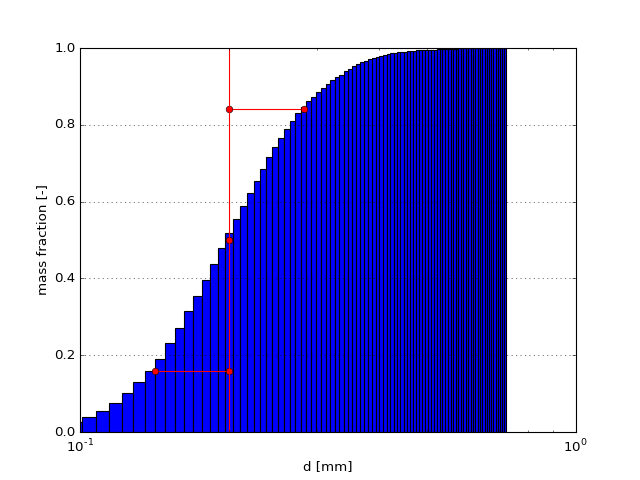

In [5]:
d50 = 0.2 # mm
U   = 2.0

# convert to linear scale to sample from the normal probability density function
mu    = np.log10(d50)
sigma = np.log10(np.sqrt(U))
x     = np.random.randn(int(1e4)) * sigma + mu  # sample a million points

# convert back to the real-world scale
d = 10.**x

# show histogram of normalized comumulative distribution = sieve curve
ax = plt.figure().add_subplot(111)
ax.hist(d, bins=100, normed=True, cumulative=True)

# get the x-axis and covert to log scale, set labels
ax.set(xscale='log', xlim=(1e-1, 1.), xlabel='d [mm]', ylabel='mass fraction [-]')
ax.set_title("Generated sand sieve curve with $d_{50} = 0.2\,$ mm and $u = \sqrt(2)$")
ax.grid(True)

# Plot the mean and the sigma's as derived above
ax.plot(10**mu, 0.5, 'ro')
ax.plot([10**(mu-sigma), 10**mu], [0.16, 0.16], 'ro-') # sigma at 16%
ax.plot([10**mu, 10**(mu+sigma)], [0.84, 0.84], 'ro-') # sigma at 84%
ax.plot([10**mu, 10**mu], [0., 1.], 'r-') # vertical line through d50
plt.show()

This this instrument in place we can now investigate the moisture distribution of an arbitrary sand of which the grain distribution can be characterized by a normal probability density function with mean grain size $d_{50}$ and uniformity coefficient $U$.

The grain size distribution is easily converted to pore radius distribution by noting that the volume of pores is $1-\epsilon$ times the volume of grains, where $\epsilon$ is the porosity. This is a constant factor, that only shifts the distribution horizontally on its log axis.

$$ r =  \frac d 2 \,\,\frac { \epsilon} { 1 - \epsilon }$$

Using our relation between pore radius $r$ and capillary rise $h_c$, we can link to associate with each pore radius.


<IPython.core.display.Javascript object>


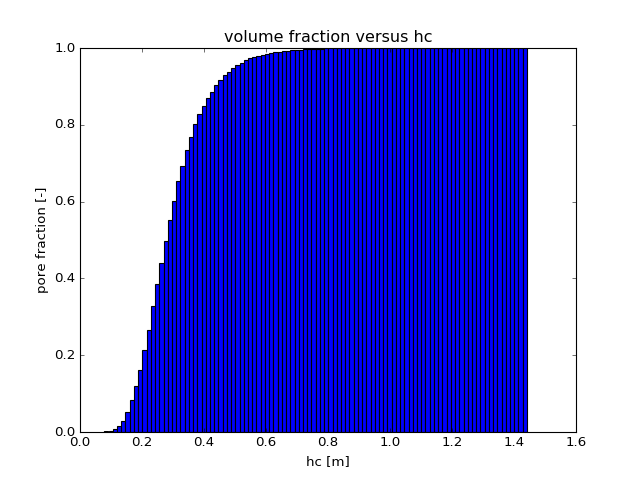

In [6]:
g     = 9.81 # N/kg, gravity
rho   = 1000. # density of water, kg/m3
por   = 0.35 # porosity
tau   = 75.e-3 # N/m water surface tension

r = np.sort((d/2) * por/(1 - por)) # also sort
hc = 2 * tau / (rho * g * r/1000.)  # hc in m by converting r to m

ax1 = plt.figure().add_subplot(111)
ax1.hist(hc, bins=100, normed=True, cumulative=True)
ax1.set(xlabel="hc [m]", ylabel="pore fraction [-]", title="volume fraction versus hc")
plt.show()

<IPython.core.display.Javascript object>


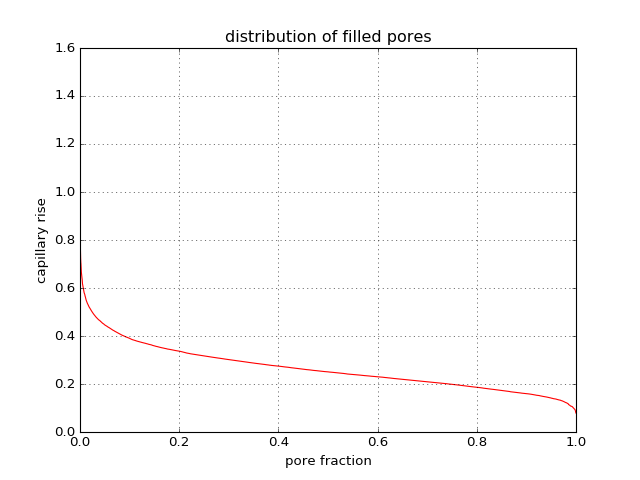

In [7]:
fr = np.cumsum(r)/np.sum(r) # fraction of pores with radius smaller than r

ax1=plt.figure().add_subplot(111)
ax1.set(xscale='linear',xlabel='pore fraction',ylabel='capillary rise', title='distribution of filled pores')
ax1.plot(fr,hc,'r')
ax1.grid(True)
plt.show()

Now that were are able to generate a capillary rise curve from the mean diameter and the uniformity coefficient of a sand sieve curve, we may investigate different situations. For example curves with more spread.
Let's use the same r, but multiply it to make the sand finer or coarser



In [8]:
phi_units = np.arange(-11, 10)

size = ["v. large", "large", "medium", "small",
        "large", "small",
        "v. coarse", "coarse", "medium", "fine", "v. fine",
        "v. coarse", "coarse", "medium", "fine", "v. fine",
        "v. coarse", "coarse", "medium", "fine", "v. fine"]
cla1 =  4 * ["boulders"] + 2 * ["cobbles"] + 5 * ["pebbles"] + 5 * ["sand"] + 5 * ["silt"]
cla2 = 11 * ["gravel"]   + 5 * ["sand"]    + 5 * ["mud"]

print(("{:11s}" * 6).format("d mm", "d mm", "size", "class", "class", " hc [m]"))
for pu, sz, c1, c2 in zip(phi_units, size, cla1, cla2):
    rp = 2**(-pu) * por/(1-por) /2.
    h = 2 *tau / (rho * g * rp/1000)
    if pu<0:
        print("{:<7d}".format(2**(-pu)), end="")
    else:
        print("1/{:<5d}".format(2**pu), end="")
    print(("{:>10.3g}   " + 3 * " {:<10s}" + "{:10.3g}").format(2.**(-pu), sz, c1, c2, h))


d mm       d mm       size       class      class       hc [m]    
2048     2.05e+03    v. large   boulders   gravel      2.77e-05
1024     1.02e+03    large      boulders   gravel      5.55e-05
512           512    medium     boulders   gravel      0.000111
256           256    small      boulders   gravel      0.000222
128           128    large      cobbles    gravel      0.000444
64             64    small      cobbles    gravel      0.000887
32             32    v. coarse  pebbles    gravel       0.00177
16             16    coarse     pebbles    gravel       0.00355
8               8    medium     pebbles    gravel        0.0071
4               4    fine       pebbles    gravel        0.0142
2               2    v. fine    pebbles    gravel        0.0284
1/1             1    v. coarse  sand       sand          0.0568
1/2           0.5    coarse     sand       sand           0.114
1/4          0.25    medium     sand       sand           0.227
1/8         0.125    fine       sand 

<IPython.core.display.Javascript object>


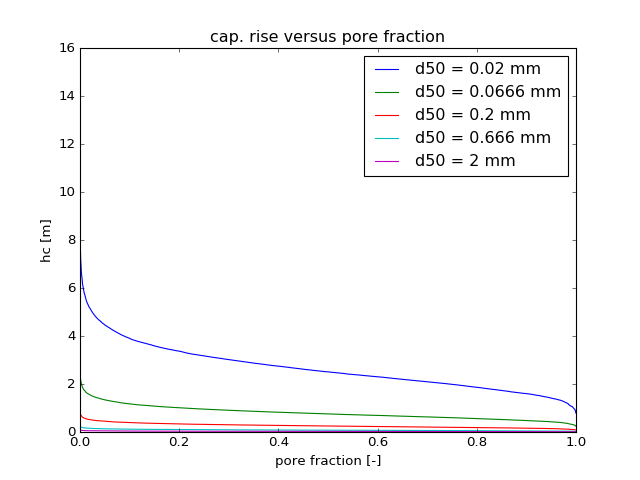

In [9]:
D50  =  [0.002, 0.02, 0.2, ]
mult =  [0.1, 0.333, 1.0, 3.33, 10.]
u    =  [1.2,  ]
ax2 = plt.figure().add_subplot(111)
ax2.set(xlabel='pore fraction [-]', ylabel='hc [m]', title='cap. rise versus pore fraction')
for m in mult:
    hc = 2 * tau / (rho * g * (m * r/1000))
    ax2.plot(fr, hc, label="d50 = {:.3g} mm".format(d50 * m))
ax2.legend(loc='best')
plt.show()

Below some sieve curves are given 

Donhuai Sun, Bloemendal, J, Rea, DK, and Ruixia Su (2002) Grain-size distribution function of polymodal sediments in hydraulic and Aeolian environments, and numerical partitioning of the sedimentary components, in Sedimentary Geology 152(3-4):263-277 · October 2002, DOI: 10.1016/S0037-0738(02)00082-9.

![Some loesses](./pictures/someLoesses.png)

Figure: Particle distribution of some loesses

Below we define a function called sieveCurve, that generates and shows sieve curves from any number of constituing particle distributions that are specified each by means of its mean, standard deviation and fraction of this distribution to the total mass of the sand. Se we can take the constituing grain size contributions of the Loess examples in the figure and create from that the overall sieve curve, that we can show and use to compute the moisture distribution above the water table (i.e. above the plane where p=atmospheric pressure). The computed water distributions will only be valid when there is no vertical flow in the unsaturated zone.

<IPython.core.display.Javascript object>


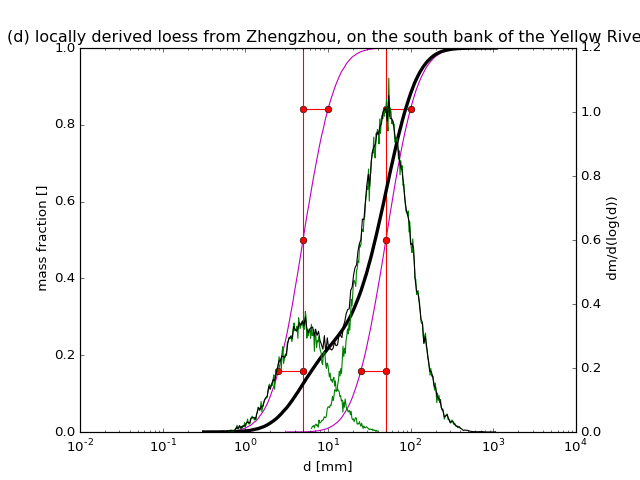

<IPython.core.display.Javascript object>


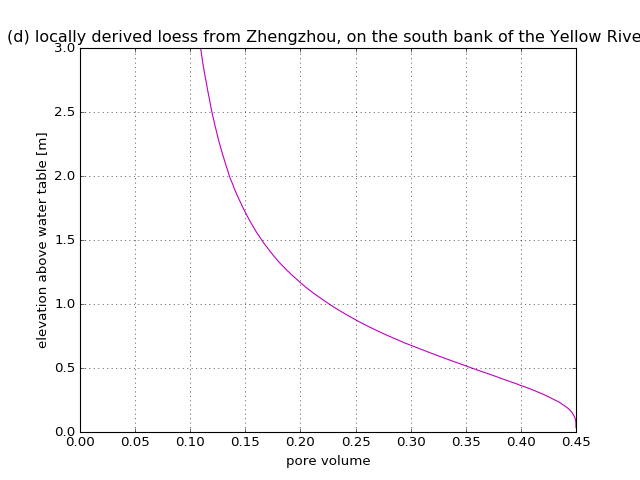

f=     0.250, d50=     5.000, u=     4.000, m= 25000.000, mu=     0.699, sigma=     0.301
f=     0.750, d50=    50.000, u=     4.000, m= 75000.000, mu=     1.699, sigma=     0.301


In [10]:
def sieveCurve(sediment, sed_props, n=100000):
    """Returns sieve curve data from input.
    parameters:
    -----------
    sediment: [str,: name of the sediment, float:porosity]
    sed_props: [[f, d50, u, clr], [f, d50, u, clr], ...]
        f   is the relative mass contribution,
        d50 the mean grain diameter,
        u   the uniformity
            taken as ratio of the diameters between +- sigma around d50.
            The distributions are assumed normal with mu=log10(d50) and sigma=log(sqrt(u))
        clr the color of the line
    n : int, total number of random samples
    
    """
    D  = np.array([])
    
    name, por = sediment
    ax1.set_title(name)  # name of the sediment
    ax1.set_xlabel('d [mm]')
    ax1.set_ylabel(' mass fraction []')
    ax2.set_ylabel(' dm/d(log(d))')
    for props in sed_props:
        f, d50, u, clr = props
        m     = round(f * n)
        mu    = np.log10(d50)
        sigma = np.log10(np.sqrt(u))
        print("f={:10.3f}, d50={:10.3f}, u={:10.3f}, m={:10.3f}, mu={:10.3f}, sigma={:10.3f}".format(f, d50, u, m, mu, sigma))
        
        # sampling the normal distribution
        x  = np.sort(np.random.randn(int(m)) * sigma + mu)
        d  = 10.0**x # convert to log normal
        h  = np.arange(1, m+1) / m # because we measure and sample mass not grains
        
        ax1.plot(d, h, clr, label=name) # cumulative distribtuion
        ax1.plot(d50, 0.5, 'ro') # show its center
        ax1.plot([10**(mu-sigma), d50], [0.16, 0.16], 'ro-') # show sigma at 16%
        ax1.plot([d50, 10**(mu+sigma)], [0.84, 0.84], 'ro-') # show sigma at 84%
        ax1.plot([d50, d50], [0., 1.], 'r-') # vertical line through d50
        
        # sampling the cumulative distribution for the derivative
        xs = np.linspace(mu-3*sigma, mu+3*sigma, 200) # 200 sampling points
        dx = np.diff(xs)
        xm = 0.5 * (xs[:-1] + xs[1:])
        dm = 10**xm  # d at between two sampling locations

        hi = np.interp(xs, x, h) # get interpolated points of cum. distr.
        dh = np.diff(hi) # increment of cum. distr.
        p = dh/dx  # derivative is prob. density on linear scale
        ax2.plot(dm, f * dh/dx, 'g')
        D = np.hstack((D, d))
      
    # pdf combined
    D = np.sort(D)
    X = np.log10(D) # back to linear axis
    N = len(D)
    H = np.arange(1., N+1) / N
    ax1.plot(D, H, 'k-', linewidth=3, label=name) # combined cumulative pdf
    
    Xs = np.linspace(X[0],x[-1], 201)
    Hi = np.interp(Xs, X, H) # sample H
    Xm = 0.5 * (Xs[1:] + Xs[:-1]) # sample locations for derivative
    Dm = 10**Xm # to log scale
    ax2.plot(Dm, np.diff(Hi)/np.diff(Xs), 'k-', label=name)
    
    # plot hc versus volume fraction
    r  = D/2 * por / (1 - por) / 1e6 # pore radius in m    
    hc = 2 * tau / (rho * g * r)
    ax3.set_title(name)
    ax3.plot(H * por, hc, clr, label=name)
    
    return D
        
    
titles =  [["(a) loess from Xian, southern Loess Plateau", 0.45],
          ["(b) sand from the Mu-Us Desert", 0.45],
          ["(c) late Tertiary aeolian red clay from Xifeng, central Loess Plateau", 0.45],
          ["(d) locally derived loess from Zhengzhou, on the south bank of the Yellow River", 0.45]]

sediments = [[[0.55, 4., 10., 'r'], [0.45,  10., 4., 'r']],
           [[0.06, 6.,  3., 'b'], [0.94, 150., 8., 'b']],
           [[0.80, 6., 10., 'g'], [0.20,  35., 2., 'g']],
           [[0.25, 5.,  4., 'm'], [0.75,  50., 4., 'm']]]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set(xscale='log', ylim=(0.0, 1.0), xlim=(1.e-2, 1.e4))
ax3 = plt.figure().add_subplot(111)
ax3.set(xlabel='pore volume', ylabel='elevation above water table [m]', ylim=(0., 3.))
ax3.grid(True)

d = sieveCurve(titles[3], sediments[3])

#ax1.legend(loc='best')
#ax3.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


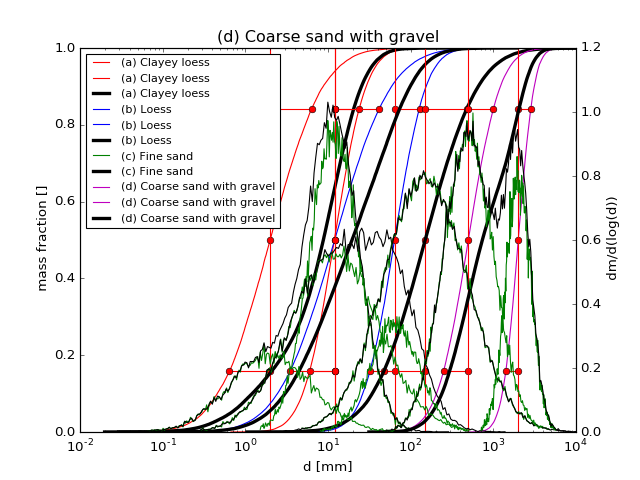

<IPython.core.display.Javascript object>


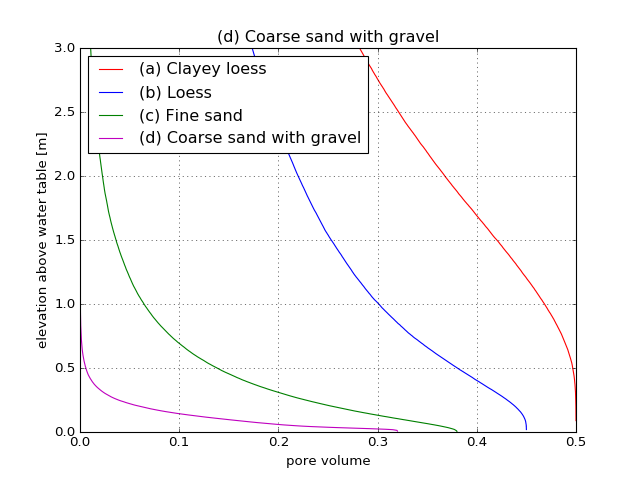

f=     0.300, d50=     2.000, u=    10.000, m= 30000.000, mu=     0.301, sigma=     0.500
f=     0.700, d50=    12.000, u=     4.000, m= 70000.000, mu=     1.079, sigma=     0.301
f=     0.750, d50=    12.000, u=    12.000, m= 75000.000, mu=     1.079, sigma=     0.540
f=     0.250, d50=    64.000, u=     4.000, m= 25000.000, mu=     1.806, sigma=     0.301
f=     1.000, d50=   150.000, u=    10.000, m=100000.000, mu=     2.176, sigma=     0.500
f=     0.700, d50=   500.000, u=     4.000, m= 70000.000, mu=     2.699, sigma=     0.301
f=     0.300, d50=  2000.000, u=     2.000, m= 30000.000, mu=     3.301, sigma=     0.151


In [11]:
names =  [["(a) Clayey loess", 0.50],
          ["(b) Loess", 0.45],
          ["(c) Fine sand", 0.38],
          ["(d) Coarse sand with gravel", 0.32]]
sediments = [[[0.30,  2., 10., 'r'], [0.70,  12.,  4., 'r']],
             [[0.75, 12., 12., 'b'], [0.25,  64.,  4., 'b']],
             [[1.00,150., 10., 'g']],
             [[0.70,500.,  4., 'm'], [0.30, 2000., 2., 'm']], 'k', 'coarse sand w. gravel']

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set(xscale='log', ylim=(0.0, 1.0), xlim=(1.e-2, 1.e4))

ax3 = plt.figure().add_subplot(111)
ax3.set(xlabel='pore volume', ylabel='elevation above water table [m]', ylim=(0., 3.))
ax3.grid(True)

for name, sediment in zip(names, sediments):
    sieveCurve(name, sediment)
    
ax1.legend(loc='best', fontsize='small')
ax3.legend(loc='best', fontsize='small')

plt.show()

In [12]:
ax3.legend(loc='best')
plt.show()

## Specific retention and specific yield

The specific retention is the amount of water retained in the soil when the water table is dropped. One measure is to define the specific retention as the moisture content in the soil when suction is 1 m (100 cm). Looking at the graph above one sees that the specific retention for gravel is almost zero, for find sand it would be around 70 L/m3, for loess 300 L/m3 and for clay 450 L/m3. Dividing by the porosity in L/m3 yields the moisture content of the samples. Specific yield is just porosity minus specific retention. It is the amount of water released from a m3 of soil due to lowering the head by 1 m. It can also be expressed as a percentage as is done in the figure below.

![Specific yield and specific retention (Bear, 1973)](./pictures/porosity-specific-yield-and-retention.png)

This picture form Bear(1973) shows the relation of porosity with grain size (compare with the computed moisture cuvers above) and the specific yield and specific retention. The finer the sediment, the larger the specific retention, and, therfore, the smaller the specific yield. Less sorted sediment yields a higher specific retention than well-sorted sediment, which is due to a larger percentage of fine pores that hold water better.